In [2]:
model_path = '/data/yinjyun/projects/gmvae-timbre/gmvae-synth/saved/Sol_GMVAE_v2/melspec_256-first_chunk-include_onset-fix_piano-normalize-ss_1.0-latent_16-pow_0-lvl_0-pc_1-pd_1-val_lower_bound/model_best.pth'
# model_path = '/data/yinjyun/projects/gmvae-timbre/gmvae_v2-timbre/saved/Sol_GMVAE_v2/melspec_256-first_chunk-include_onset-fix_piano-normalize-ss_0.0-latent_16-pow_0-lvl_0-pc_1-pd_1-val_lower_bound/model_best.pth'

In [3]:
sr = 22050
n_fft = 2048
n_mel = 256
hop_length = 256
fmin = 27
fmax = 11000

In [4]:
import sys
sys.path[0] = '/data/yinjyun/projects/gmvae-timbre/gmvae-synth/'

In [5]:
import torch
import data_loader.data_loaders as module_data
from data_loader.data_loaders import NormDataLoader
import model.model as module_arch
from utils import get_instance

In [6]:
resume = torch.load(model_path)
config = resume['config']

In [7]:
resume['logger'].entries

{1: {'epoch': 1,
  'loss': 1642.6571219308037,
  'lower_bound': -1120.5062909807477,
  'logpx_z': -1069.3484191894531,
  'neg_kld_y': -0.5983803996018001,
  'neg_kld_z': -50.559494972229004,
  'h_y': -1.8865262866020203,
  'label_loss': 3.4395449672426497,
  'pitch_emb': 514.1075744628906,
  'pitch_classify': 4.60371504511152,
  'test_acc': 0.29028003343514036,
  'classify_acc': 0.07467532467532467,
  'mfcc': 0.0,
  'flux': 0.0,
  'val_loss': 1084.9755859375,
  'val_lower_bound': -638.8144226074219,
  'val_logpx_z': -637.2743530273438,
  'val_neg_kld_y': -0.397944912314415,
  'val_neg_kld_z': -1.1421399116516113,
  'val_h_y': -2.0869617462158203,
  'val_label_loss': 2.922356128692627,
  'val_pitch_emb': 438.65850830078125,
  'val_pitch_classify': 4.5803282260894775,
  'val_test_acc': 0.33298787474632263,
  'val_classify_acc': 0.09311224489795919,
  'mfcc_loss': 0.0,
  'flux_loss': 0.0},
 2: {'epoch': 2,
  'loss': 1020.0756094796317,
  'lower_bound': -657.3125784737723,
  'logpx_z': -62

-1.246666090829032

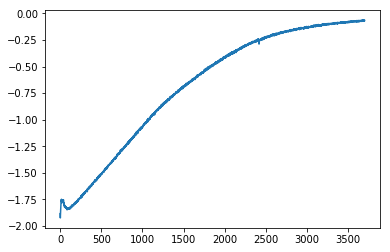

In [24]:
import matplotlib.pyplot as plt
plt.plot([v['h_y'] for k, v in resume['logger'].entries.items()])
[v['h_y'] for k, v in resume['logger'].entries.items()][792]

In [7]:
n_class = config['arch']['args']['n_class']
latent_dim = config['arch']['args']['latent_dim']
batch_size = config['data_loader']['args']['batch_size']

In [48]:
model.state_dict()

OrderedDict([('mu_lookup.weight',
              tensor([[ 1.2398e-01, -7.6053e-01,  2.6540e-01, -2.0922e-01,  8.0000e-01,
                       -2.2630e+00,  8.4840e-01,  6.5990e-01, -6.9258e-01, -2.2033e-02,
                       -1.0905e+00,  3.0837e-01,  2.4499e+00,  5.0111e-01,  4.0028e-01,
                       -4.1481e-01],
                      [ 4.0605e-01, -1.5442e+00,  4.6497e-01,  7.9589e-01,  2.6293e-01,
                        5.0409e-01, -4.7600e-01, -6.0289e-01, -1.4655e+00, -2.3160e-01,
                        4.7567e-01, -2.9560e-01, -2.9336e+00, -7.8017e-01, -1.4836e+00,
                        2.0314e-01],
                      [-1.0723e+00,  2.1457e+00,  1.3561e+00, -5.8938e-02, -1.0268e+00,
                       -1.1929e-01,  7.4574e-01,  6.6810e-01, -1.5635e+00, -6.3325e-01,
                        1.9246e+00, -8.1224e-01,  1.0621e+00,  1.4269e+00,  1.6470e+00,
                       -9.7688e-01],
                      [-1.1032e-01, -1.3938e+00, -1.3534e+00, -

In [52]:
[i for i in model.named_parameters() if 'encoder' in i[0]]

[('encoder.0.weight', Parameter containing:
  tensor([[[-0.0294,  0.0247,  0.0062],
           [-0.0242, -0.0238, -0.0169],
           [ 0.0174,  0.0233, -0.0094],
           ...,
           [ 0.0329,  0.0282,  0.0038],
           [ 0.0185, -0.0133,  0.0225],
           [ 0.0233,  0.0224, -0.0211]],
  
          [[ 0.0066, -0.0078,  0.0390],
           [-0.0153, -0.0241, -0.0288],
           [ 0.0385, -0.0272, -0.0005],
           ...,
           [ 0.0053,  0.0253,  0.0236],
           [ 0.0110,  0.0035, -0.0011],
           [ 0.0061,  0.0198, -0.0274]],
  
          [[ 0.0115,  0.0325,  0.0091],
           [-0.0089,  0.0242, -0.0003],
           [-0.0160, -0.0254,  0.0137],
           ...,
           [ 0.0324, -0.0071, -0.0313],
           [-0.0032, -0.0084, -0.0316],
           [-0.0216,  0.0131,  0.0108]],
  
          ...,
  
          [[-0.0317,  0.0272, -0.0162],
           [-0.0018,  0.0081, -0.0191],
           [ 0.0062, -0.0043, -0.0064],
           ...,
           [-0.0126, -

In [53]:
resume['logger'].entries

{1: {'epoch': 1,
  'loss': 1641.562264578683,
  'lower_bound': -1122.943607875279,
  'logpx_z': -1067.9473746163505,
  'neg_kld_y': -0.6015548578330449,
  'neg_kld_z': -54.39468707357134,
  'h_y': -1.8833518624305725,
  'label_loss': 0.0,
  'pitch_emb': 514.0152718680246,
  'pitch_classify': 4.603407212666103,
  'test_acc': 0.2897219977208546,
  'classify_acc': 0.06853693181818181,
  'mfcc': 0.0,
  'flux': 0.0,
  'val_loss': 1080.8197631835938,
  'val_lower_bound': -638.01806640625,
  'val_logpx_z': -636.4662170410156,
  'val_neg_kld_y': -0.3989381194114685,
  'val_neg_kld_z': -1.1529260873794556,
  'val_h_y': -2.085968494415283,
  'val_label_loss': 0.0,
  'val_pitch_emb': 438.2215270996094,
  'val_pitch_classify': 4.580187797546387,
  'val_test_acc': 0.32278379797935486,
  'val_classify_acc': 0.09311224489795919,
  'mfcc_loss': 0.0,
  'flux_loss': 0.0},
 2: {'epoch': 2,
  'loss': 1023.3357674734933,
  'lower_bound': -663.5487104143415,
  'logpx_z': -626.6600952148438,
  'neg_kld_y': -

In [30]:
model = get_instance(module_arch, 'arch', config)
model.summary()
model.load_state_dict(resume['state_dict'])
model.eval()
model.is_featExtract = False

data_loader = get_instance(module_data, 'data_loader', config)
valid_data_loader = data_loader.split_validation()

Trainable parameters: 34334354
CnnGMVAE(
  (mu_lookup): Embedding(12, 16)
  (logvar_lookup): Embedding(12, 16)
  (encoder): Sequential(
    (0): Conv1d(256, 512, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv1d(512, 512, kernel_size=(3,), stride=(1,))
    (4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (encoder_fc): Sequential(
    (0): Linear(in_features=19968, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (lin_mu): Linear(in_features=512, out_features=16, bias=True)
  (lin_logvar): Linear(in_features=512, out_features=16, bias=True)
  (decoder_fc): Sequential(
    (0): Linear(in_features=32, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (

In [2]:
config

Available objects for config:
     AliasManager
     DisplayFormatter
     HistoryManager
     IPCompleter
     IPKernelApp
     LoggingMagics
     MagicsManager
     OSMagics
     PrefilterManager
     ScriptMagics
     StoreMagics
     ZMQInteractiveShell


In [9]:
data_loader.dataset.ins_map

{'EH_nA': 0,
 'Hn': 1,
 'Corf': 1,
 'Corm': 1,
 'trbt': 2,
 'TpC': 3,
 'trof': 3,
 'trom': 3,
 'trop': 3,
 'Pno': 4,
 'Vn': 5,
 'Vc': 6,
 'ASax': 7,
 'Bn': 8,
 'fagf': 8,
 'fagm': 8,
 'fagp': 8,
 'ClBb': 9,
 'clbb': 9,
 'Fl': 10,
 'Ob': 11}

In [17]:
for k,v in data_loader.dataset.dict_cat_inst_idx.items():
    print(inv_ins_map[k], len(v))

Ehn 128
Fhn 214
Trtb 63
Trop 194
Pno 246
Vn 138
Vc 147
Sax 99
Bn 251
Clr 180
Fl 118
Ob 107


In [8]:
import math
import librosa
from IPython.display import display, Audio
from tqdm import tqdm

In [9]:
def griffinlim(spectrogram, n_iter = 100, window = 'hann', n_fft = 2048, hop_length = -1, verbose = False):
    if hop_length == -1:
        hop_length = n_fft // 4

    angles = np.exp(2j * np.pi * np.random.rand(*spectrogram.shape))

    t = tqdm(range(n_iter), ncols=100, mininterval=2.0, disable=not verbose)
    for i in t:
        full = np.abs(spectrogram).astype(np.complex) * angles
        inverse = librosa.istft(full, hop_length = hop_length, window = window)
        rebuilt = librosa.stft(inverse, n_fft = n_fft, hop_length = hop_length, window = window)
        angles = np.exp(1j * np.angle(rebuilt))

        if verbose:
            diff = np.abs(spectrogram) - np.abs(rebuilt)
            t.set_postfix(loss=np.linalg.norm(diff, 'fro'))

    full = np.abs(spectrogram).astype(np.complex) * angles
    inverse = librosa.istft(full, hop_length = hop_length, window = window)

    return inverse


def denormalize(S, d_min, d_max):
    S = ((S + 1) / (2)) * (d_max - d_min) + d_min
    S = np.exp(S)
    return S

dl_norm = NormDataLoader(data_dir="/data/yinjyun/datasets/sol/acidsInstruments-ordinario/data/melspec_256-first_chunk-include_onset-fix_piano/",
                         batch_size=512, validation_split=0.1, shuffle=True, num_workers=0)

d_max = -math.inf
d_min = math.inf
for i, (data, target, idx) in enumerate(dl_norm):
    if data.max().item() > d_max:
        d_max = data.max().item()    
    if data.min().item() < d_min:
        d_min = data.min().item()
        
mel_filter = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mel, fmin=fmin, fmax=fmax)

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Controllable Synthesis of Instrument Sounds
## Given pitches and instrument to play with

In [14]:
pitch_map = data_loader.dataset.pitch_map
inv_pitch_map = {v: k for k, v in pitch_map.items()}
# ins_map = data_loader.dataset.ins_map
# inv_ins_map = {v: k for k, v in ins_map.items()}
desired_ins_key = ['Ehn', 'Fhn', 'Trtb', 'Trop', 'Pno', 'Vn', 'Vc', 'Sax', 'Bn', 'Clr', 'Fl', 'Ob']
ins_map = {i: n for n, i in enumerate(desired_ins_key)}
inv_ins_map = {v: k for k, v in ins_map.items()}

In [30]:
# scale = ['C4', 'E4', 'G4']
scale = ['C4', 'E4']
# scale = ['C4', 'F4', 'A4', 'C5']
# scale = ['C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5']
# scale = ['C2', 'C3', 'C4','C5']
# scale = ['C4', 'C#4', 'D4','D#4', 'E4', 'F4', 'F#4']
scale_ind = [pitch_map[i] for i in scale]

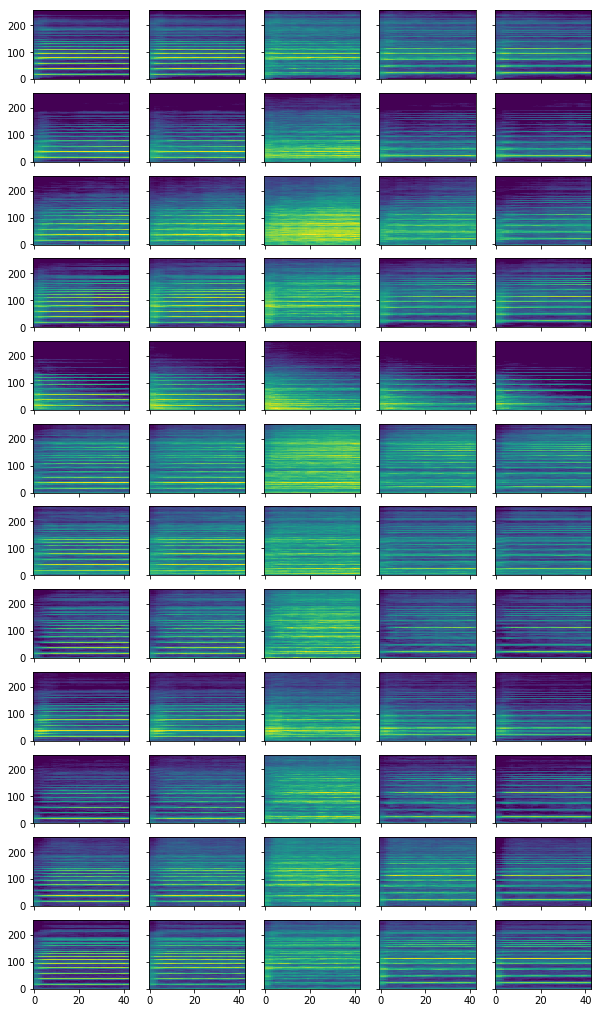

In [31]:
desired = [ins_map[i] for i in desired_ins_key]
weight = 0  # sampling from the mode - the means of each mixture component
# fig, ax = plt.subplots(len(desired), len(scale), figsize=(len(scale) * 2, len(desired) * 1.5), sharex=True, sharey=True)
len_interpolation = 5
fig, ax = plt.subplots(len(desired), len_interpolation, figsize=(len_interpolation * 2, len(desired) * 1.5), sharex=True, sharey=True)
model.is_featExtract = False
for i, n in enumerate(desired):
    n = torch.tensor(n)
    mu_k = model.mu_lookup(n).data.unsqueeze(0)
    logvar_k = model.logvar_lookup(n).data.unsqueeze(0)
    if i == 0:
        mu_prior = mu_k
        logvar_prior = logvar_k
    else:
        mu_prior = torch.cat([mu_prior, mu_k], dim=0)
        logvar_prior = torch.cat([logvar_prior, logvar_k], dim=0)

    z_t = model._infer_latent(mu_k, logvar_k, weight=weight)[2]  # sample from prior

#     for m, (pitch_name, pitch_ind) in enumerate(zip(scale, torch.tensor(scale_ind))):
#         mu_m = model.pitch_mu_lookup(pitch_ind).unsqueeze(0)
#         logvar_m = model.pitch_logvar_lookup(pitch_ind).unsqueeze(0)
#         # pitch_emb = model.pitch_mu_lookup(pitch_ind).unsqueeze(0)
#         z_p = model._infer_latent(mu_m, logvar_m, weight=weight)[2]
#         S = model._decode(torch.cat([z_t, z_p], dim=1)).data.numpy().squeeze(0)
#         S = denormalize(S, d_min, d_max)
#         ax[i][m].imshow(librosa.power_to_db(S), aspect='auto', origin='lower')
#         S_stft = np.dot(mel_filter.T, S)
#         x = griffinlim(S_stft, n_iter=50, n_fft=n_fft, hop_length=hop_length)
#         print('-'.join([inv_ins_map[n.item()], pitch_name]))
#         display(Audio(x, rate=sr))
#         # img_title = '-'.join([inv_ins_map[i], pitch_name])
#         if i == 0:
#             ax[i][m].set_title(pitch_name)
#         if m == 0:
#             ax[i][m].set_ylabel(inv_ins_map[n.item()], rotation=0, size='large')
#             ax[i][m].yaxis.set_label_coords(-0.4, 0.4)

# #plt.savefig('/data/yinjyun/projects/gmvae-timbre/gmvae_v2-timbre/saved/Sol_GMVAE_v2/controllable_%s_spec.eps' % weight, format='eps', dpi=50)

    source_pitch, target_pitch = scale_ind[0], scale_ind[-1]
    source_mu = model.pitch_mu_lookup(torch.tensor(source_pitch)).unsqueeze(0)
    target_mu = model.pitch_mu_lookup(torch.tensor(target_pitch)).unsqueeze(0)
    for m, beta in enumerate(torch.torch.linspace(0, 1, len_interpolation)):
        pitch_latent = source_mu + beta * (target_mu - source_mu)
        S = model._decode(torch.cat([z_t, pitch_latent], dim=1)).data.numpy().squeeze(0)
        S = denormalize(S, d_min, d_max)
        ax[i][m].imshow(librosa.power_to_db(S), aspect='auto', origin='lower')
        S_stft = np.dot(mel_filter.T, S)
        x = griffinlim(S_stft, n_iter=50, n_fft=n_fft, hop_length=hop_length)
        display(Audio(x, rate=sr))

# Many-to-many transfer of instrument timbre

## Keep source pitch and convert to target timbre

In [15]:
import pandas as pd

In [16]:
pitchclass_map = data_loader.dataset.pitchclass_map
dyn_map = data_loader.dataset.dynamic_map
inv_pitchclass_map = {v: k for k, v in pitchclass_map.items()}
inv_dyn_map = {v: k for k, v in dyn_map.items()}

In [17]:
def call_inv_dyn(x):
    return inv_dyn_map[x]

def call_inv_pitchclass(x):
    return inv_pitchclass_map[x]

def call_inv_pitch(x):
    return inv_pitch_map[x]

def call_inv_ins(x):
    return inv_ins_map[x]

def get_octave(x):
    return x[-1]

def get_octave_range(x):
    if int(x) <= 2:
        return 'low'
    elif int(x) <=4:
        return 'mid'
    else:
        return 'high'

In [18]:
model.is_featExtract = True

In [19]:
import librosa

In [20]:
torch.manual_seed(123)
with torch.no_grad():
    for i, (data, target, data_ind) in enumerate(data_loader):
    #for i, (data, target, data_ind) in enumerate(valid_data_loader):
        y_ins, y_pitch_class, y_pitch, y_dyn = target[0], target[1], target[2], target[3]
        n_band, context_size = data.size(2), data.size(3)
        data = data.view(-1, n_band, 1, context_size).squeeze(2)
        x_predict, mu, logvar, z, log_q_y_logit, q_y, ind, pitch_mu, pitch_logvar, pitch_z, pitch_logit\
            = model(data)
        x_predict_norm = denormalize(x_predict.data.numpy(), d_min, d_max)
        x_predict_wav = np.vstack([np.expand_dims(griffinlim(np.dot(mel_filter.T, i),
                                                              n_iter=50, n_fft=n_fft, hop_length=hop_length), 0) 
                                   for i in x_predict_norm])
        sc = [librosa.feature.spectral_centroid(S=i).mean() for i in x_predict_norm]
        if i == 0:
            idx_all = data_ind
            assign = ind
            d_all = data
            z_all = z
            mu_all = mu
            logvar_all = logvar
            ins_gt = y_ins
            pitch_gt = y_pitch
            pitchclass_gt = y_pitch_class
            dyn_gt = y_dyn
            x_predict_all = x_predict
            x_predict_wav_all = x_predict_wav
            sc_all = [sc]
            if model.is_pitch_condition:
                pitch_z_all = pitch_z
        else:
            idx_all = torch.cat([idx_all, data_ind])
            assign = torch.cat([assign, ind])
            d_all = torch.cat([d_all, data], dim=0)
            z_all = torch.cat([z_all, z], dim=0)
            mu_all = torch.cat([mu_all, mu])
            logvar_all = torch.cat([logvar_all, logvar], dim=0)
            ins_gt = torch.cat([ins_gt, y_ins])
            pitch_gt = torch.cat([pitch_gt, y_pitch])
            pitchclass_gt = torch.cat([pitchclass_gt, y_pitch_class])
            dyn_gt = torch.cat([dyn_gt, y_dyn])
            x_predict_all = torch.cat([x_predict_all, x_predict], dim=0)
            x_predict_wav_all = np.vstack([x_predict_wav_all, x_predict_wav])
            sc_all.append(sc)
            if model.is_pitch_condition:
                pitch_z_all = torch.cat([pitch_z_all, pitch_z], dim=0)

In [44]:
def minmaxNorm(x, min_val=0, max_val=1, global_min=None, global_max=None):
    if global_min and global_max:
        x_min = global_min
        x_max = global_max
    else:
        x_min = x.min()
        x_max = x.max()
    nom = x - x_min
    den = x_max - x_min

    if abs(den) > 1e-4:
            return (max_val - min_val) * (nom / den) + min_val
    else:
        return nom

In [25]:
np.save('train_wav.npy', x_predict_wav_all)

In [22]:
d = {
    'ins': ins_gt.data.numpy(),
    'pitch': pitch_gt.data.numpy(),
    'pitchclass': pitchclass_gt.data.numpy(),
    'dyn': dyn_gt.data.numpy(),
    'assign': assign.data.numpy(),
    'sc': [j for i in sc_all for j in i],
}
df = pd.DataFrame(d)
df['dyn_inv'] = np.vectorize(call_inv_dyn)(df['dyn'])
df['pitchclass_inv'] = np.vectorize(call_inv_pitchclass)(df['pitchclass'])
df['pitch_inv'] = np.vectorize(call_inv_pitch)(df['pitch'])
df['ins_inv'] = np.vectorize(call_inv_ins)(df['ins'])
df['octave'] = np.vectorize(get_octave)(df['pitch_inv'])
df['octave_range'] = np.vectorize(get_octave_range)(df['octave'])
df.head()

ins  pitch  pitchclass  dyn  assign           sc dyn_inv pitchclass_inv  \
0    8     43           5    2       8  1134.984747      mf              D   
1    9     44           5    4       9   661.322556      pp              D   
2   11     60           9    1      11  3644.255312      ff             F#   
3    0     10           0    2       0  2533.102098      mf              A   
4    0     73          11    2       0  2427.141451      mf             G#   

  pitch_inv ins_inv octave octave_range  
0        D2      Bn      2          low  
1        D3     Clr      3          mid  
2       F#5      Ob      5         high  
3        A3     Ehn      3          mid  
4       G#4     Ehn      4          mid

In [23]:
def recognize_family(x):
    if x in [0, 1, 2, 3]:
        y = 'brass'
    elif x in [5, 6]:
        y = 'string'
    elif x == 4:
        y = 'piano'
    else:
        y = 'wind'
    return y

In [24]:
df['family'] = np.vectorize(recognize_family)(df['ins'])
# df.groupby(['family', 'ins_inv']).size()
# pins.groupby(['instrument', 'pitch']).size().unstack(fill_value=0)

In [52]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import plotly
import plotly.graph_objs as go
from plotly.offline import *
plotly.offline.init_notebook_mode(connected=True)
COLORS = ['#B3BE2D', '#E6FB21', '#56501C', '#4ABFF4', '#2BD7FA', '#B95969',
          '#6CCDB4', '#DFF462', '#26601A', '#D70CF8', '#565BDE', '#EF134B']

seed = 123
mat_z = np.vstack([z_all, mu_prior])

emb = PCA(n_components=3, random_state=seed)
#emb = TSNE(n_components=3, random_state=seed)

z_emb = emb.fit_transform(mat_z)
l_emb = z_emb[:z_all.shape[0], :]
p_emb = z_emb[z_all.shape[0]:, :]

#np.save('tsne_mu_prior.npy', p_emb)
np.save('pca_mu_prior.npy', p_emb)
df['pca_x'], df['pca_y'], df['pca_z'] = l_emb[:,0], l_emb[:,1], l_emb[:,2]
#df['tsne_x'], df['tsne_y'], df['tsne_z'] = l_emb[:,0], l_emb[:,1], l_emb[:,2]

def get_trace(color_code='instrument'):
    if color_code == 'instrument':
        dict_map = ins_map
        array_gt = ins_gt
    elif color_code == 'dynamic':
        dict_map = dyn_map
        array_gt = dyn_gt

    trace = [go.Scatter3d(
        x=l_emb[array_gt.numpy() == v][:, 0], 
        y=l_emb[array_gt.numpy() == v][:, 1], 
        z=l_emb[array_gt.numpy() == v][:, 2],
        name=k,
        mode='markers',
        marker=dict(
            size=5,
            line=dict(width=0.5),
            color = c
        ),
        opacity=1
    ) for ((k, v), c) in zip(dict_map.items(), COLORS)]
    layout = go.Layout(
        margin=dict(
            l=0, r=0, b=0, t=0)
    )
    return trace, layout

trace, layout = get_trace(color_code='instrument')
fig = go.Figure(data=trace, layout=layout)
#py.iplot(fig, filename='simple-3d-scatter')
plotly.offline.iplot(fig, filename='gauge-meter-chart.html')

In [53]:
def drop_rows(df, ratio=0.6):
    n_entry = len(df)
    n_keep = int(n_entry * (1 - ratio))
    return df.loc[np.random.choice(df.index.to_list(), size=n_keep, replace=False)]

np.random.seed(123)
df_drop = df.groupby('ins_inv', group_keys=False).apply(lambda x: drop_rows(x))

In [54]:
df.to_csv('df.csv')
df_drop.to_csv('df_drop.csv')

In [58]:
array_wav_drop = x_predict_wav_all[df_drop.index.to_numpy()]
array_spec_drop = x_predict_all.numpy()[df_drop.index.to_numpy()]

In [315]:
!mkdir audios
!mkdir spec_figs

In [200]:
import scipy.io.wavfile as sw

In [251]:
n = 0

for i, wav, spec in zip(df_drop.index.to_numpy(), array_wav_drop, array_spec_drop):

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(librosa.power_to_db(denormalize(spec, d_min, d_max)), aspect='auto', origin='lower',
              extent=[0, array_spec_drop.shape[-1]*1000*hop_length/sr, 
                      0, n_mel])
    yticks = [50, 100, 150, 200, 250]
    ax.set_yticks(yticks)
    plt.xlabel('time (ms)', fontsize=15)
    plt.ylabel('Mel bins', fontsize=15)
    plt.title('')
    plt.savefig('spec_figs/%s.png' % i, format='png')
    plt.close()
    sw.write('audios/%s.wav' % i, sr, wav)
    

In [483]:
mfcc_all = []
for i in array_spec_drop:
    i = librosa.power_to_db(denormalize(i, d_min, d_max))
    mfcc_all.append(np.median(librosa.feature.mfcc(S=i, n_mfcc=13),axis=1))
    #mfcc_all.append(np.mean(librosa.feature.mfcc(S=i, n_mfcc=13),axis=1))
mfcc_all = np.vstack(mfcc_all)

In [484]:
df_drop[['mfcc_'+str(i) for i in range(13)]] = mfcc_all

In [487]:
d = dict.fromkeys(('mfcc_' + str(i) for i in range(13)), 'mean')

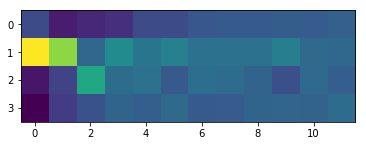

In [490]:
plt.imshow((df_drop.groupby(['family']).agg(d).to_numpy() - df_drop.groupby(['family']).agg(d).to_numpy().mean(axis=0))[:, 1:])


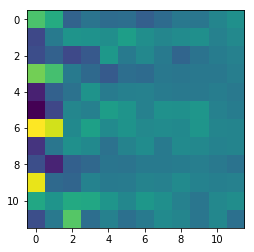

In [478]:
plt.imshow((df_drop.groupby(['ins_inv']).agg(d).to_numpy() - df_drop.groupby(['ins_inv']).agg(d).to_numpy().mean(axis=0))[:, 1:])


In [491]:
df_drop.groupby(['ins_inv']).agg(d)

mfcc_0      mfcc_1      mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
ins_inv                                                                        
Bn      -433.884011  182.397626   -5.149789 -29.472637 -26.572040 -20.702334   
Clr     -581.242121   61.224328  -44.824618  18.421753   1.519377   8.037368   
Ehn     -475.666163   72.482180  -74.294583 -47.749601 -51.219364  18.542239   
Fhn     -487.696907  191.785247    5.512914  -7.316819 -33.610747 -35.867313   
Fl      -623.322428   43.232976  -71.408965 -18.796289   4.151013  -2.678305   
Ob      -486.779311   25.467796  -96.404197   2.547138 -20.158023  21.993821   
Pno     -691.031237  238.991172   52.859580   5.514260  13.126637   8.362209   
Sax     -529.471837   40.776236  -50.848751  15.389574  -0.046028 -13.796649   
Trop    -454.717128   56.314143 -115.270260 -33.531189 -38.929544 -16.937866   
Trtb    -364.364909  225.795986  -59.657388 -23.326982 -17.273065 -10.345633   
Vc      -345.545162  134.817225  -28.152931  33.160735  19.097465  15.196502   
Vn      -380.627810   63.818753  -50.768483  58.596062 -32.758143  -3.618250   

            mfcc_6     mfcc_7     mfcc_8     mfcc_9    mfcc_10   mfcc_11  \
ins_inv                                                                    
Bn      -29.875820 -35.279301 -26.919796 -12.706600 -20.859770  0.536818   
Clr      12.477466   0.391149  -5.034043   2.514815  -0.507269 -2.327108   
Ehn     -23.541426  -0.937189 -12.265069 -19.151225 -22.080122 -3.493319   
Fhn     -31.442491 -25.671185 -18.037191 -13.086399 -13.930087 -4.088212   
Fl      -15.700617  -1.083861 -12.139948  -8.886516 -19.117278 -7.310822   
Ob       11.240054  -1.484433   4.312098   3.878481   8.788874  4.863869   
Pno       3.634388   2.914720   0.050064   3.641329   6.577054  3.185515   
Sax     -10.249270   8.599175  -9.860996   5.897401  -0.460351 -0.590019   
Trop    -23.374979  -9.057835  -9.549788  -3.242664  -8.705384 -6.145139   
Trtb    -19.886195  -7.199555 -10.602790   2.534508  -7.111091 -4.306762   
Vc      -10.723844  11.455138   0.530716  -4.579950 -20.955911  0.567467   
Vn      -28.384538 -11.805600  -6.346913  -3.305654 -20.475704  4.536703   

           mfcc_12  
ins_inv             
Bn        8.129898  
Clr       1.307714  
Ehn       2.677540  
Fhn      -2.138568  
Fl       -5.811808  
Ob       -0.598097  
Pno      -0.303601  
Sax      -1.648243  
Trop    -13.487417  
Trtb     -5.204787  
Vc        4.659539  
Vn      -17.779190

In [498]:
traces = []
for i in df_drop.family.unique():
    trace = go.Box(
        name=i,
        y=df_drop[df_drop.family == i]['sc'])
    traces.append(trace)
layout = go.Layout(
        margin=dict(
            l=0, r=0, b=0, t=0)
    )

fig = go.Figure(data=traces, layout=layout)
#py.iplot(fig, filename='simple-3d-scatter')
plotly.offline.iplot(fig, filename='gauge-meter-chart.html')

### Give desired source-target pair

In [49]:
source_ins = 'Fhn'
target_ins = 'Pno'
desired_octave = 4

In [50]:
mu_target = mu_prior[ins_map[target_ins]]
mu_source = mu_prior[ins_map[source_ins]]
mu_s2t = (mu_target - mu_source).unsqueeze(0)

In [51]:
source_idx = np.where((df['ins_inv'] == source_ins))[0]
filter_pitch, filter_dyn, filter_int = np.array(df['pitch_inv'][source_idx]), np.array(df['dyn_inv'][source_idx]), np.array(df['ins_inv'][source_idx])

A4 f Fhn


D5 pp Fhn


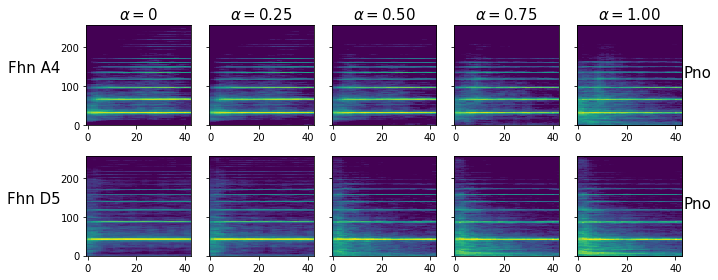

In [59]:
alpha = [0.25, 0.5, 0.75, 1.0]
n_sample = len(source_idx)
n_col = len(alpha) + 1
np.random.seed(111)
sample_idx = np.random.choice(source_idx, n_sample, replace=False)
#sample_idx = [i for i in sample_idx if df['pitch_inv'][i] in ['D3', 'G6', 'C7']]
sample_idx = [i for i in sample_idx if df['pitch_inv'][i] in ['A4', 'D5']]
n_row = len(sample_idx) 
fig, ax = plt.subplots(n_row, n_col, figsize=(n_col * 2, n_row * 2), sharey=True, sharex=False)

for n, i in enumerate(sample_idx):
    #target_ins_idx = np.where((df['ins_inv'] == target_ins) & 
    #                          (df['pitch_inv'] == df['pitch_inv'][i]))[0]
    zp_source = pitch_z_all[i].unsqueeze(0)
    zt_source = z_all[i]
    s_source = x_predict_all[i].data.numpy()
    s_source = denormalize(s_source, d_min, d_max)
    ax[n][0].imshow(librosa.power_to_db(s_source), aspect='auto', origin='lower')
    if n == 0:
        ax[n][0].set_title(r'$\alpha = 0$', fontsize=15)
    ax[n][0].set_ylabel('%s %s'% (source_ins, df['pitch_inv'][i]), rotation=360, fontsize=15)
    ax[n][0].yaxis.set_label_coords(-0.5, 0.5)
    x_source = griffinlim(np.dot(mel_filter.T, s_source), n_iter=50, n_fft=2048, hop_length=hop_length)
    print(df['pitch_inv'][i], df['dyn_inv'][i], df['ins_inv'][i])
    display(Audio(x_source, rate=22050))
    ax[n][0].imshow(librosa.power_to_db(s_source), aspect='auto', origin='lower')
    for k, a in enumerate(alpha):
        z_s2t = zt_source + a * mu_s2t
        s_transfer = model._decode(torch.cat([z_s2t, zp_source], dim=1)).squeeze(0).data.numpy()
        s_transfer = denormalize(s_transfer, d_min, d_max)

        ax[n][k + 1].imshow(librosa.power_to_db(s_transfer), aspect='auto', origin='lower')
        if n == 0:
            ax[n][k + 1].set_title(r'$\alpha = %.2f$' % a, fontsize=15)
            
        if k == len(alpha)-1:
            ax2 = ax[n][k + 1].twinx()
            ax2.set_ylabel(target_ins, rotation=360, fontsize=15)
            ax2.yaxis.set_label_coords(1.15, 0.6)
            ax2.set_yticks([])
        x_transfer = griffinlim(np.dot(mel_filter.T, s_transfer), n_iter=50, n_fft=2048, hop_length=hop_length)
        display(Audio(x_transfer, rate=22050))
plt.tight_layout()
#plt.savefig('/data/yinjyun/projects/gmvae-timbre/gmvae_v2-timbre/saved/Sol_GMVAE_v2/transfer_p2c.eps', format='eps', dpi=50)

# Identify within-class disentangled dimension

In [25]:
import matplotlib

In [26]:
matplotlib.rcParams['image.cmap']

'viridis'

In [24]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
pca = PCA()
tsne = TSNE(n_components=2)

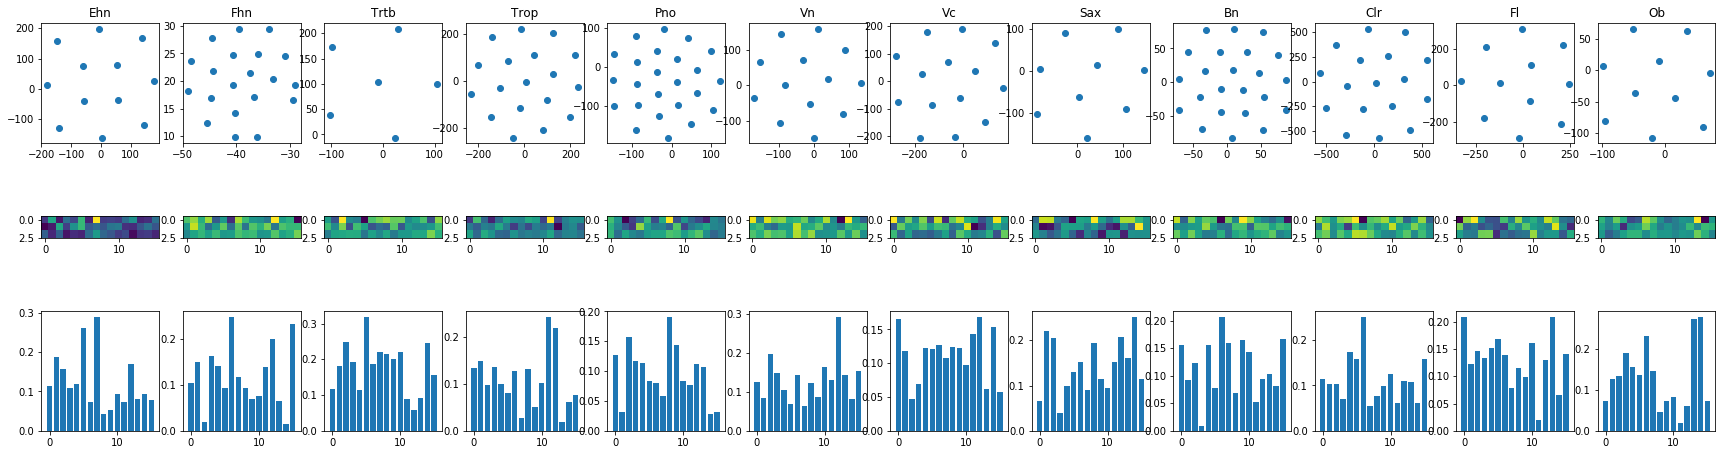

In [25]:
fig, ax = plt.subplots(3, len(inv_ins_map), figsize=(len(inv_ins_map) * 2.5, 3 * 2.5))
i = 0
for k, v in inv_ins_map.items():
    idx = np.where(df['ins_inv'] == v)[0]
    z_ins = z_all[idx]
    d_tsne = tsne.fit_transform(z_ins)
    ax[0][i].scatter(d_tsne[:, 0], d_tsne[:, 1])
    ax[0][i].set_title(v)
    
    pca = PCA(n_components=3)
    pca.fit_transform(z_ins)
    pca.components_ = pca.components_ * pca.explained_variance_ratio_.reshape(-1, 1)
    ax[1][i].imshow(pca.components_)
    ax[2][i].bar(np.arange(z_all.shape[1]), np.abs(pca.components_).sum(axis=0), align='center')
    if i == 0:
        a_all = np.abs(pca.components_).sum(axis=0)
    else:
        a_all += np.abs(pca.components_).sum(axis=0)
    i += 1

In [26]:
np.argsort(a_all)

array([11,  9,  3,  7, 14, 13,  8, 15, 10,  0,  4,  1,  2,  5, 12,  6])

In [27]:
target_dim = 12
w = 2

In [28]:
dict_sroll = {i:{} for i in ins_map.keys()}
for k, v in inv_ins_map.items():
    idx = np.where((df['ins_inv'] == v) )[0]
    z_ins = z_all[idx]
    pitch_z_ins = pitch_z_all[idx]
    std_ins = logvar_prior[k].exp().sqrt()    
    trav = torch.zeros(1, latent_dim)
    trav[:, target_dim] = std_ins[target_dim]
    pos_trav = trav * w
    neg_trav = trav * (-w)
    z_ins_mid = z_ins
    z_ins_pos = z_ins + pos_trav
    z_ins_neg = z_ins + neg_trav
    S_mid = model._decode(torch.cat([z_ins_mid, pitch_z_ins], dim=1)).data.numpy()
    S_pos = model._decode(torch.cat([z_ins_pos, pitch_z_ins], dim=1)).data.numpy()
    S_neg = model._decode(torch.cat([z_ins_neg, pitch_z_ins], dim=1)).data.numpy()
    S_mid = denormalize(S_mid, d_min, d_max)
    S_pos = denormalize(S_pos, d_min, d_max)
    S_neg = denormalize(S_neg, d_min, d_max)
    for i in range(len(idx)):
        specroll_mid = librosa.feature.spectral_centroid(S=S_mid[i]).mean()
        specroll_neg = librosa.feature.spectral_centroid(S=S_neg[i]).mean()
        specroll_pos = librosa.feature.spectral_centroid(S=S_pos[i]).mean()
        if i ==0:
            dict_sroll[v]['neg'] = [specroll_neg]
            dict_sroll[v]['mid'] = [specroll_mid]
            dict_sroll[v]['pos'] = [specroll_pos]
        else:
            dict_sroll[v]['neg'].append(specroll_neg)
            dict_sroll[v]['mid'].append(specroll_mid)
            dict_sroll[v]['pos'].append(specroll_pos)

In [29]:
import seaborn as  sns
import scipy.stats as ss

In [30]:
ins_map

{'Ehn': 0,
 'Fhn': 1,
 'Trtb': 2,
 'Trop': 3,
 'Pno': 4,
 'Vn': 5,
 'Vc': 6,
 'Sax': 7,
 'Bn': 8,
 'Clr': 9,
 'Fl': 10,
 'Ob': 11}

Ehn 6.266801635992752e-08
Fhn 0.0003307140106095107
Trtb 0.0183911932861577
Trop 4.775596943870397e-09
Pno 0.0007222201413530671
Vn 0.0010928435196396985
Vc 0.0002136850070928875
Sax 0.0009263834874527843
Bn 1.5097665957525212e-08
Clr 1.6669892827066897e-06
Fl 0.0005161847776853608
Ob 2.6426376241208925e-05


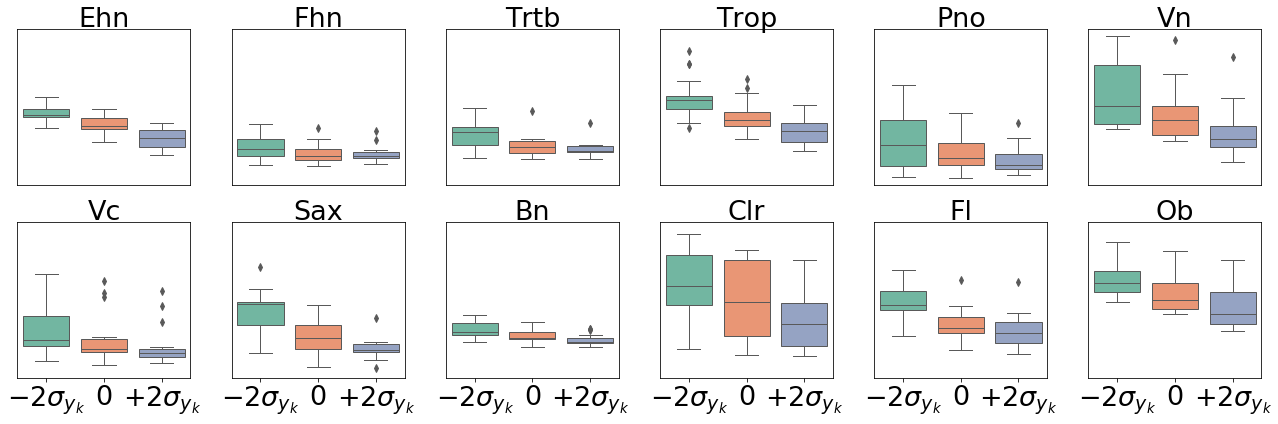

In [64]:
fig = plt.figure(figsize=(18,6))
#sns.set(rc={'figure.figsize':(20,8),"font.size":10,"axes.titlesize":15,"axes.labelsize":10},style="white")
#plt.subplots_adjust(left=None, bottom=None, right=10, top=None, wspace=None, hspace=None)
for n, (k, v) in enumerate(dict_sroll.items()):
    inst_sroll = dict_sroll[k]
    x = [r'$- 2\sigma_{y_{k}}$', r'$0$', r'$+ 2\sigma_{y_{k}}$']
    y_neg, y_mid, y_pos = inst_sroll['neg'], inst_sroll['mid'], inst_sroll['pos']
    #t, p = ss.ttest_ind(y_pos, y_neg, equal_var=False)
    t, p = ss.ttest_rel(y_neg, y_pos)
    print(k, p)
    
    if n == 0:
        ax0 = fig.add_subplot(2,6,n+1)
        # ax0.set_title(k)
        
    else:
        ax = fig.add_subplot(2,6,n+1,sharey=ax0)
    ax = sns.boxplot(x=x, y=[y_neg, y_mid, y_pos], linewidth=1, palette="Set2")
    xl = ax.get_xticklabels()
    ax.set_xticklabels(xl, fontsize=27)
    ax.set_title(k, y=0.98, fontsize=27)
    # ax.set_title(r'$\mathbf{\mu}_{Fhn\rightarrow Pno}$', y=0.98, fontsize=27)
    if k not in ['Vc', 'Sax', 'Bn', 'Clr', 'Fl', 'Ob']:
        ax.set_xticks([])
#     if k not in ['Ehn', 'Vc']:
#         ax.set_yticks([])
    # ax0.set_xticks([])

plt.tight_layout()
#plt.savefig('/data/yinjyun/projects/gmvae-timbre/gmvae_v2-timbre/saved/Sol_GMVAE_v2/spectral_centroid.eps', format='eps', dpi=50)

Trop-D5-mf


Bn-A3-mf


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


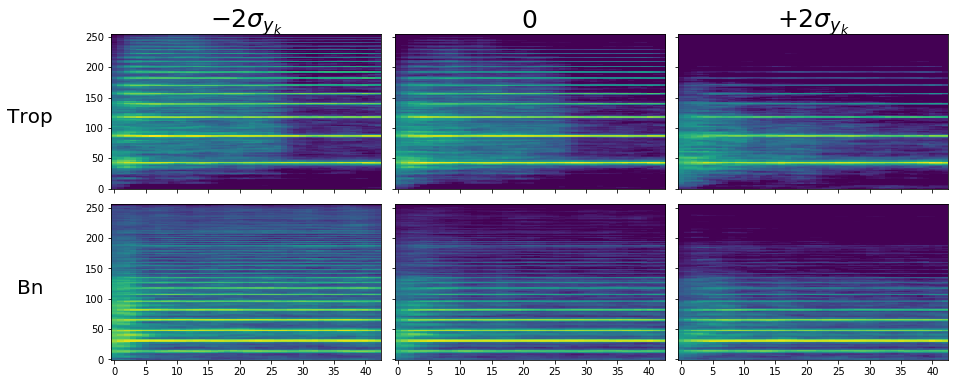

In [48]:
desired_inst = ['Trop', 'Bn']
fig, ax = plt.subplots(len(desired_inst), 3, figsize=(5 * 3, len(desired_inst)* 3), gridspec_kw = {'wspace':0.05, 'hspace':0.1},
                       sharex=True, sharey=True)
n = 0
for k, v in inv_ins_map.items():
    if v in desired_inst:
        idx = np.where((df['ins_inv'] == v) & (df['dyn_inv'] == 'mf'))[0]
        #np.random.seed(2)
        np.random.seed(123)
        idx_sample = np.random.choice(idx, 1)
        z_t = z_all[idx_sample]
        z_p = pitch_z_all[idx_sample]
        std_ins = logvar_prior[k].exp().sqrt()
        trav = torch.zeros(1, latent_dim)
        trav[:, target_dim] = std_ins[target_dim]
        pos_trav = trav * w
        neg_trav = trav * (-w)
        z_t_mid = z_t
        z_t_pos = z_t + pos_trav
        z_t_neg = z_t + neg_trav

        S_mid = model._decode(torch.cat([z_t_mid, z_p], dim=1)).squeeze(0).data.numpy()
        S_pos = model._decode(torch.cat([z_t_pos, z_p], dim=1)).squeeze(0).data.numpy()
        S_neg = model._decode(torch.cat([z_t_neg, z_p], dim=1)).squeeze(0).data.numpy()
        S_mid = denormalize(S_mid, d_min, d_max)
        S_pos = denormalize(S_pos, d_min, d_max)
        S_neg = denormalize(S_neg, d_min, d_max)


        ax[n][0].imshow(librosa.power_to_db(S_neg), aspect='auto', origin='lower')
        ax[n][1].imshow(librosa.power_to_db(S_mid), aspect='auto', origin='lower')
        ax[n][2].imshow(librosa.power_to_db(S_pos), aspect='auto', origin='lower')
        tit = '-'.join([df.iloc[idx_sample]['ins_inv'].values[0], 
                        df.iloc[idx_sample]['pitch_inv'].values[0], 
                        df.iloc[idx_sample]['dyn_inv'].values[0]])
        if n == 0:
            ax[n][0].set_title(r'$-2\sigma_{y_{k}}$', fontsize=25)
            ax[n][1].set_title(r'$0$', fontsize=25)
            ax[n][2].set_title(r'$+2\sigma_{y_{k}}$', fontsize=25)

        ax[n][0].set_ylabel(v, rotation=360, fontsize=20)
        ax[n][0].yaxis.set_label_coords(-0.3, 0.4)
        S_mid = np.dot(mel_filter.T, S_mid)
        S_pos = np.dot(mel_filter.T, S_pos)
        S_neg = np.dot(mel_filter.T, S_neg)
        x_mid = griffinlim(S_mid, n_iter=50, n_fft=n_fft, hop_length=hop_length)
        x_pos = griffinlim(S_pos, n_iter=50, n_fft=n_fft, hop_length=hop_length)
        x_neg = griffinlim(S_neg, n_iter=50, n_fft=n_fft, hop_length=hop_length)
        print(tit)
        display(Audio(x_neg, rate=sr))
        display(Audio(x_mid, rate=sr))
        display(Audio(x_pos, rate=sr))
        n+=1
plt.tight_layout()
plt.savefig('/data/yinjyun/projects/gmvae-timbre/gmvae_v2-timbre/saved/Sol_GMVAE_v2/spectral_centroid_spec.eps', format='eps', dpi=50)

In [ ]:
from IPython.display import Audio, display, clear_output
from ipywidgets import widgets
import sounddevice as sd
from pydub import AudioSegment
from pydub.playback import play


# def numpy_to_ogg(array):
#     audio_seg = AudioSegment(array.tobytes(), frame_rate=22050, sample_width=array.dtype.itemsize, channels=1)
#     play(audio_seg)

class InvisibleAudio(Audio):
    def _repr_html_(self):
        audio = super()._repr_html_()
        audio = audio.replace('<audio', f'<audio onended="this.parentNode.removeChild(this)"')
        return f'<div style="display:none">{audio}</div>'

# button1 = widgets.Button(description='My Button1')
# button2 = widgets.Button(description='My Button2')
# button3 = widgets.Button(description='My Button')
buttons = [widgets.Button(description=i) for i in ['button1', 'button2']]
outputs = [widgets.Output() for i in range(len(buttons))]
# out1 = widgets.Output()
# out2 = widgets.Output()
def on_button_click1(_):
    with outputs[0]:
        clear_output()
        display(InvisibleAudio(griffinlim(dd[47], hop_length=hop_length, n_iter=50), rate=sr, autoplay=True))        
def on_button_click2(_):
    with outputs[1]:
        clear_output()
        display(InvisibleAudio(griffinlim(dd[44], hop_length=hop_length, n_iter=50), rate=sr, autoplay=True))        

class A(object):
    pass

#for i, j, k in zip(buttons, outputs, [on_button_click1, on_button_click2]):
for i, j, k, l in zip(buttons, outputs, [dd[44], dd[47]], [on_button_click1, on_button_click2]):
    print(i, j, l)
#     def on_button_click(_):
#         with j:
#             clear_output()
#             display(InvisibleAudio(griffinlim(k, hop_length=hop_length, n_iter=50), rate=sr, autoplay=True))
#     setattr(A, l, on_button_click)
    #print(getattr(A, l), hasattr(A, one))
    #i.on_click(getattr(A, l))
    i.on_click(l)
# linking button and function together using a button's method
# button1.on_click(on_button_clicked1)
# button2.on_click(on_button_clicked2)
# displaying button and its output together
widgets.HBox([buttons[0], buttons[1], outputs[0], outputs[1]])